# Data Analysis
## Import Packages & Data

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/us_accidents_expanded.csv')

## Feature Distribution
We would like to analyze distributions for some of the features to get a general
idea of our classes.

### Target Feature

Severity Counts
Severity
1      4274
2    398142
3     84520
4     13064
Name: count, dtype: int64


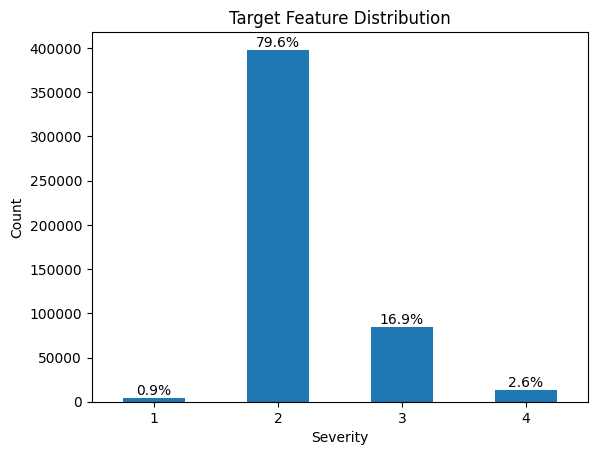

In [85]:
severity_counts = df['Severity'].value_counts().sort_index()
print('Severity Counts')
print(severity_counts)

# plot
severity_percentage = severity_counts / df.shape[0] * 100
ax = severity_counts.plot(kind='bar')
for i, count in enumerate(severity_counts):
    ax.text(i, count + 5, f'{severity_percentage[i + 1]:.1f}%', ha='center', va='bottom')

plt.title('Target Feature Distribution')
plt.xlabel('Severity')
plt.xticks(rotation=0)
plt.ylabel('Count');

Clearly there is an imbalance in the distribution for severity levels, with the vast majority of records being level `2`. We will need to keep that in mind when
we're training our ML models.

### Other Features
For other numerical features, we can take a look at the distribution of those values.

In [102]:
numerical_columns = [
    'Distance(mi)',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)',
    'Elapsed_Hours'
]

df[numerical_columns].describe()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Elapsed_Hours
count,500000.000000,489534.000000,489534.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000,500000.000000
mean,0.564317,61.646254,60.425381,64.834921,29.536621,9.091540,7.681347,0.008289,7.032168
std,1.774872,19.000133,21.140861,22.826158,1.008666,2.708083,5.431361,0.101865,220.108075
min,0.000000,-77.800000,-77.800000,1.000000,0.120000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,49.000000,48.900000,48.000000,29.370000,10.000000,4.600000,0.000000,0.500000
50%,0.029000,64.000000,64.000000,67.000000,29.860000,10.000000,7.000000,0.000000,1.200000
75%,0.465000,76.000000,76.000000,84.000000,30.030000,10.000000,10.400000,0.000000,2.100000
max,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000,37273.400000


### Boxplots
In this section, we perform a boxplot analysis to understand how various numerical features vary across different accident severity levels. Boxplots provide a visual representation of the distribution of data, highlighting the median, quartiles, and potential outliers within each severity group.

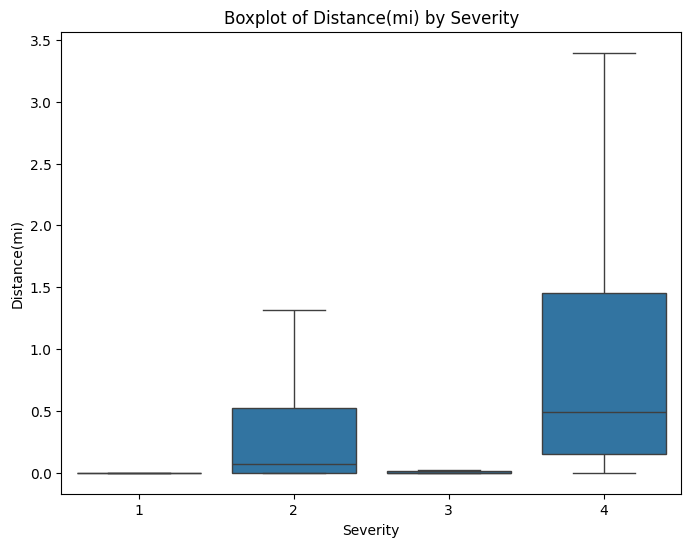

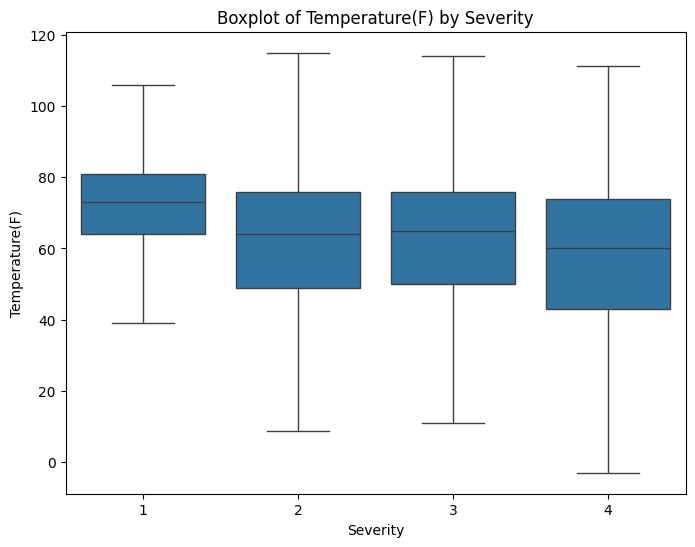

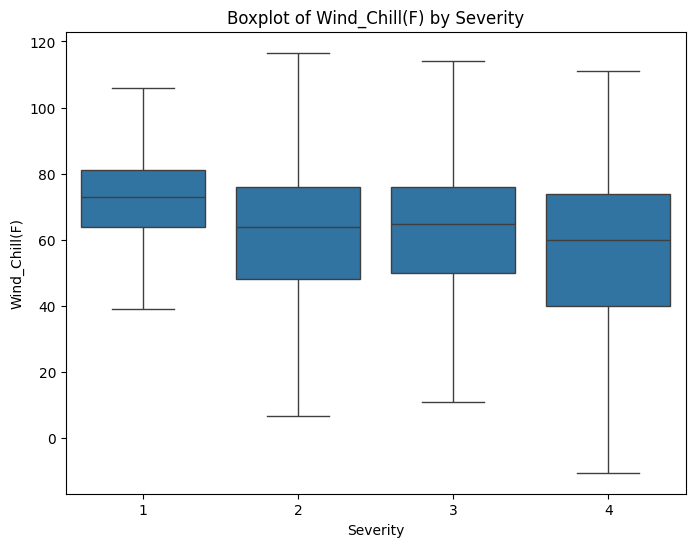

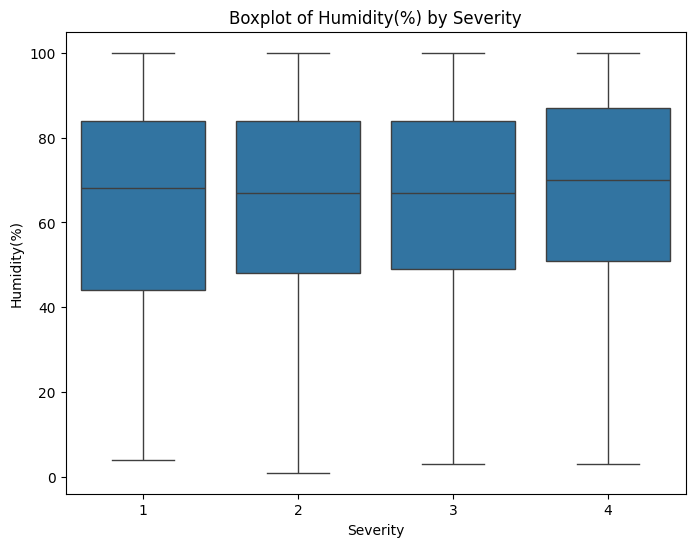

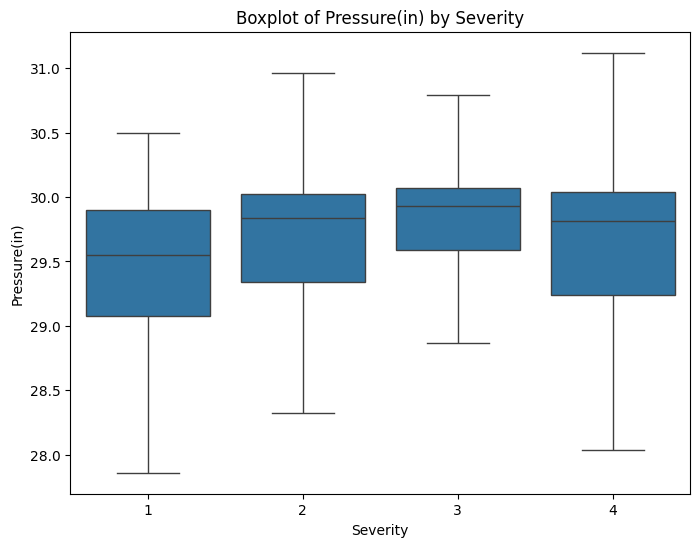

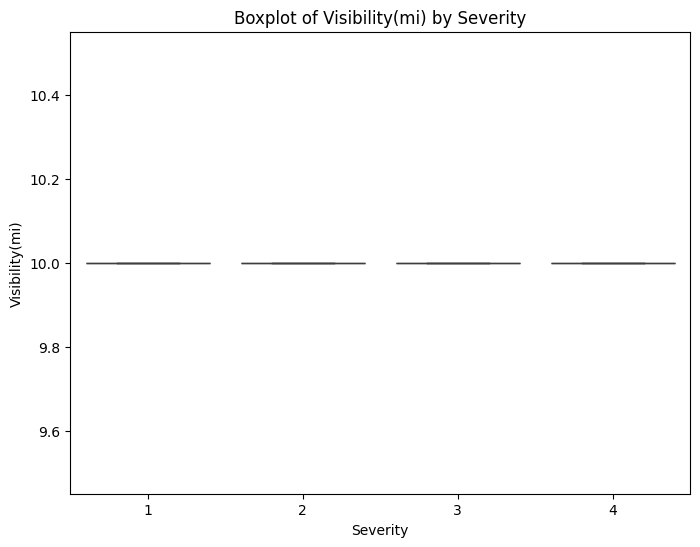

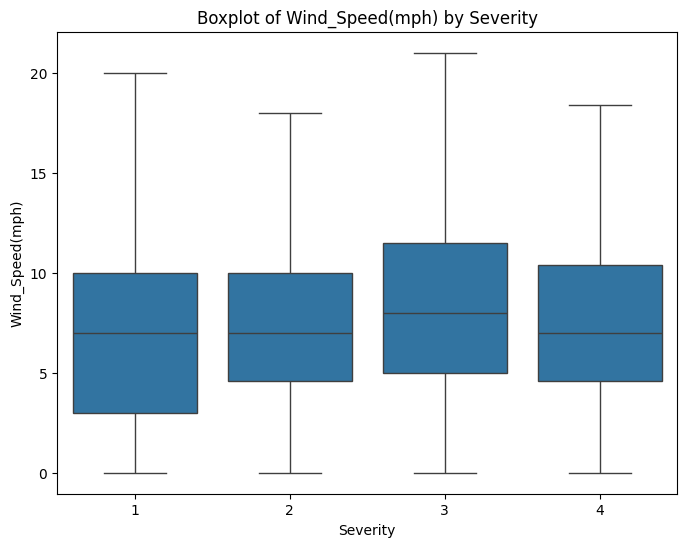

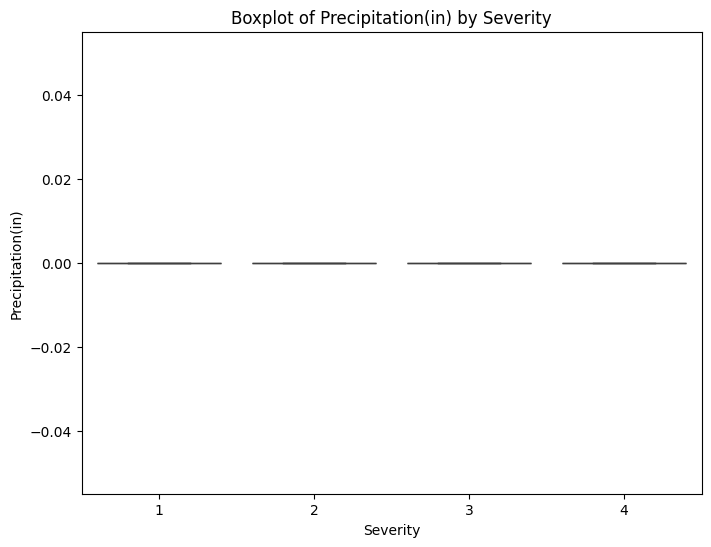

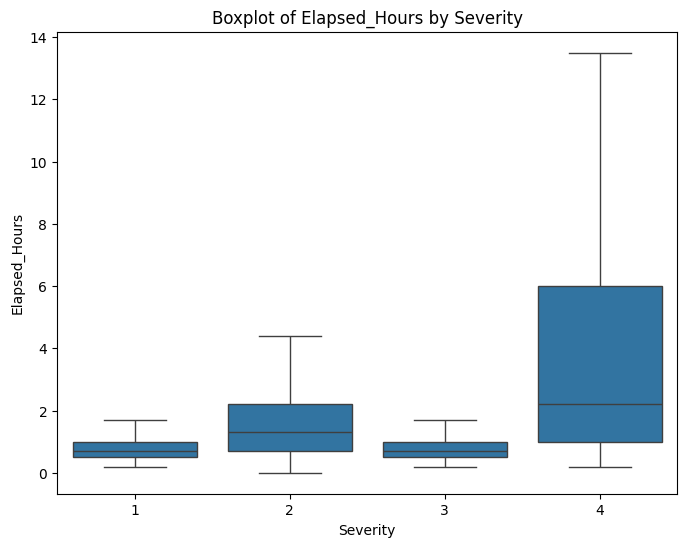

In [108]:
for feature in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x='Severity',
        y=feature,
        data=df,
        showfliers=False
    )
    plt.title(f'Boxplot of {feature} by Severity')
    plt.show()


## Correlations
We can take a look at how each feature correlates with our target variable `Severity`.
To help with performance, we'll be splitting our features into several batches
and throw up a correlation matrix for each category.

### Process
First, we need to prepare the dataset by dropping unnecessary features and normalizing.

In [88]:
df_corr = df.copy()

# drop timestamps
df_corr = df_corr.drop(columns=['Start_Datetime', 'End_Datetime', 'Weather_Timestamp', 'Start_Date', 'End_Date', 'Start_Time', 'End_Time'])
# todo, encode time numerically

# drop address information and description
df_corr = df_corr.drop(columns=['Description', 'Street', 'City', 'County', 'Zipcode', 'Airport_Code'])

# change day/night to true/false respectively
day_night = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df_corr[day_night] = df_corr[day_night].replace('Day', True)
df_corr[day_night] = df_corr[day_night].replace('Night', False)

# normalize numerical features
scaler = MinMaxScaler()
numeric_columns = df_corr.select_dtypes(include=['number']).columns
df_corr[numeric_columns] = scaler.fit_transform(df_corr[numeric_columns])

df_corr.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_New England,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,0.333333,0.248761,0.584845,0.248768,0.584845,0.000000,0.543539,0.543539,0.616162,0.777662,...,False,False,False,False,False,False,False,False,False,True
1,0.333333,0.590423,0.826094,0.590418,0.826108,0.000289,0.431180,0.424157,0.474747,0.777401,...,False,False,False,False,False,False,False,True,False,False
2,0.333333,0.413262,0.070240,0.413273,0.070246,0.000114,0.511938,0.511938,0.727273,0.774269,...,True,False,False,False,False,False,True,False,False,False
3,0.333333,0.782343,0.552575,0.782364,0.552945,0.005448,0.367978,0.325843,0.858586,0.740344,...,False,False,False,False,False,False,False,False,True,False
4,0.333333,0.443310,0.096683,0.443322,0.096669,0.000238,0.420646,0.420646,0.333333,0.773747,...,True,False,False,False,False,False,True,False,False,False


### Weather Info

### Road Conditions

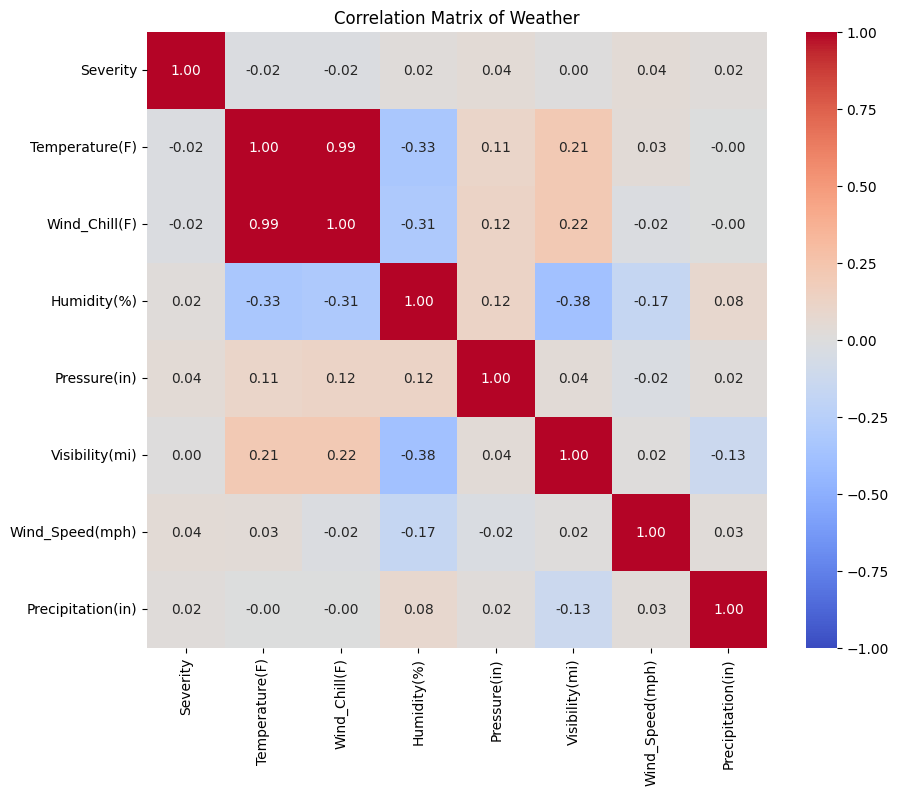

In [89]:
df_corr_weather = df_corr[[
    'Severity',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)'
]]

weather_corr = df_corr_weather.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather");


### Road Conditions

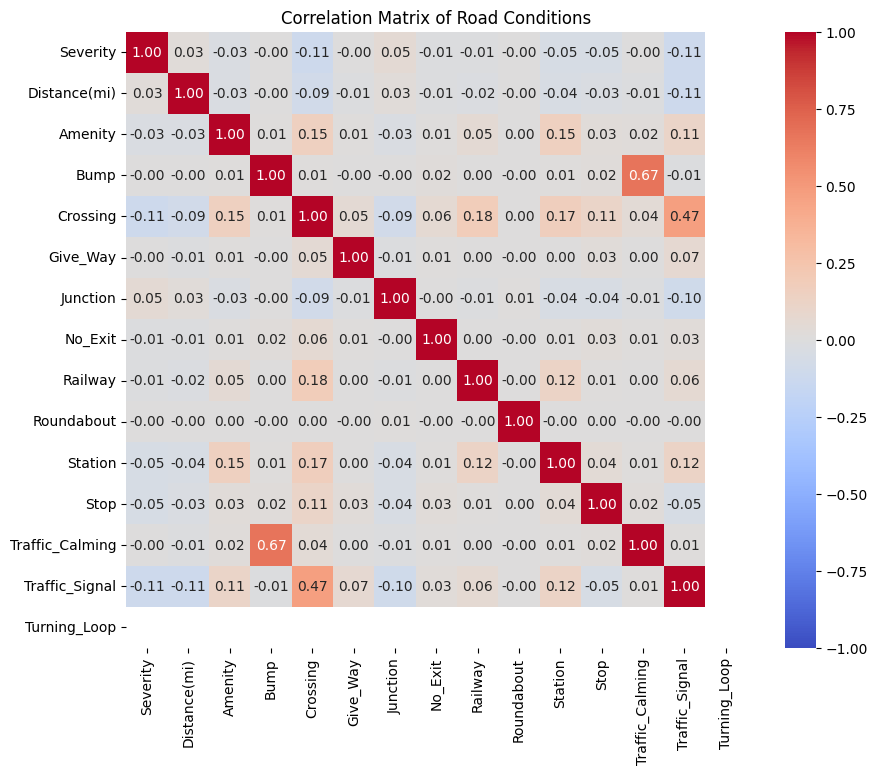

In [90]:
df_corr_road_conditions = df_corr[[
    'Severity',
    'Distance(mi)',
    'Amenity',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction',
    'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    'Traffic_Signal',
    'Turning_Loop'
]]

weather_corr = df_corr_road_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Road Conditions");


One thing we noticed here was that `Turning_Loop` had no values. Apparently the only
value it has is False, so the correlation matric couldn't capture any information
about it.

### Weather Conditions

In [91]:
weather_conditions = [col for col in df_corr.columns if col.startswith('Weather_Condition_')]
len(weather_conditions)

108

There are 108 features so we'll need to generate multiple matrices.

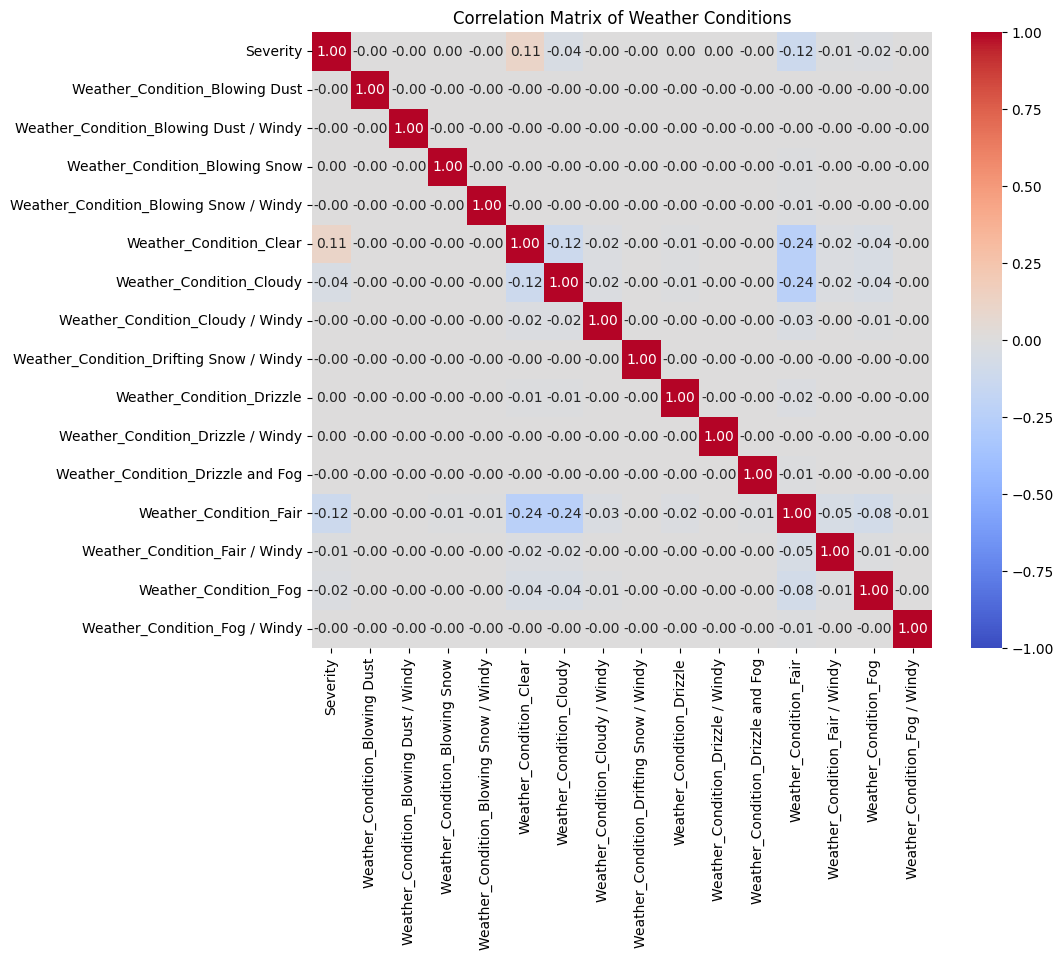

In [92]:
numerical_columns = ['Severity'] + weather_conditions[0:15]
df_corr_weather_conditions = df_corr[numerical_columns]
weather_corr = df_corr_weather_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather Conditions");

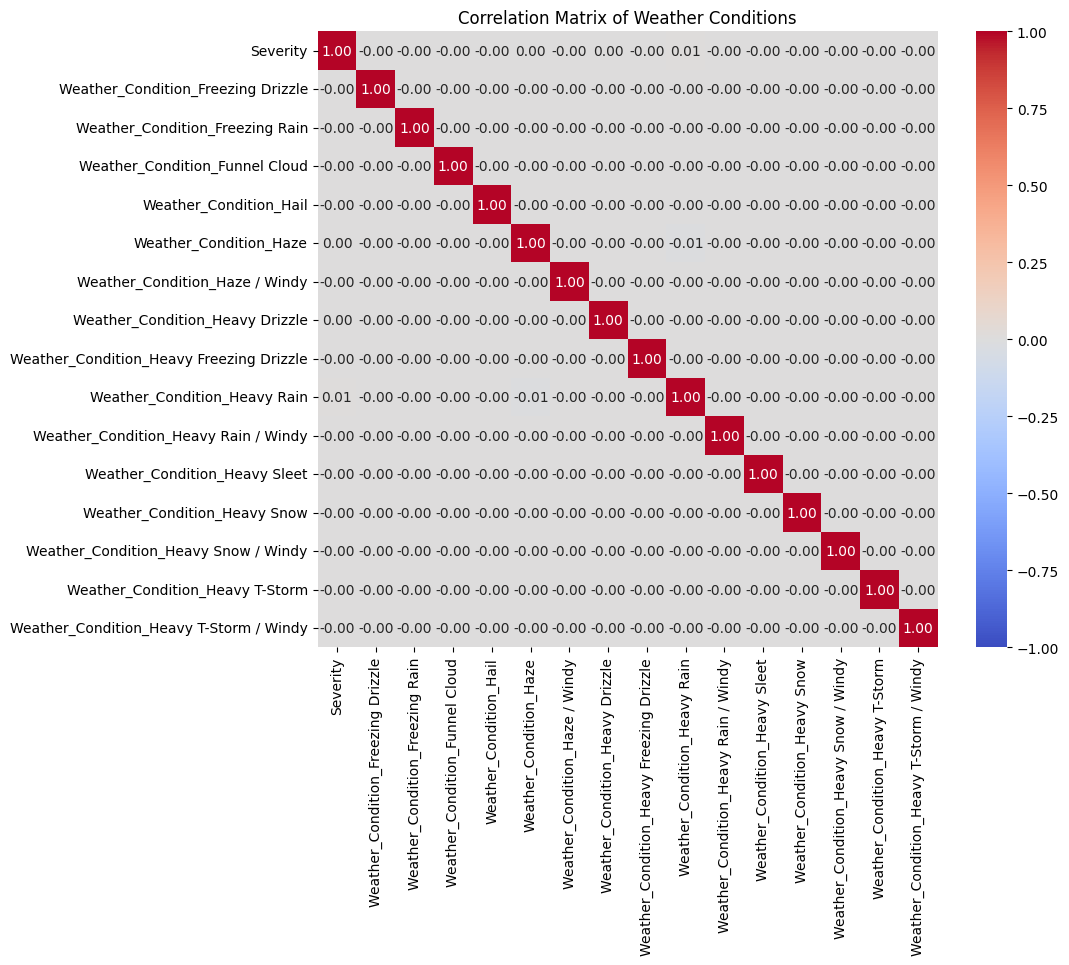

In [93]:
numerical_columns = ['Severity'] + weather_conditions[15:30]
df_corr_weather_conditions = df_corr[numerical_columns]
weather_corr = df_corr_weather_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather Conditions");

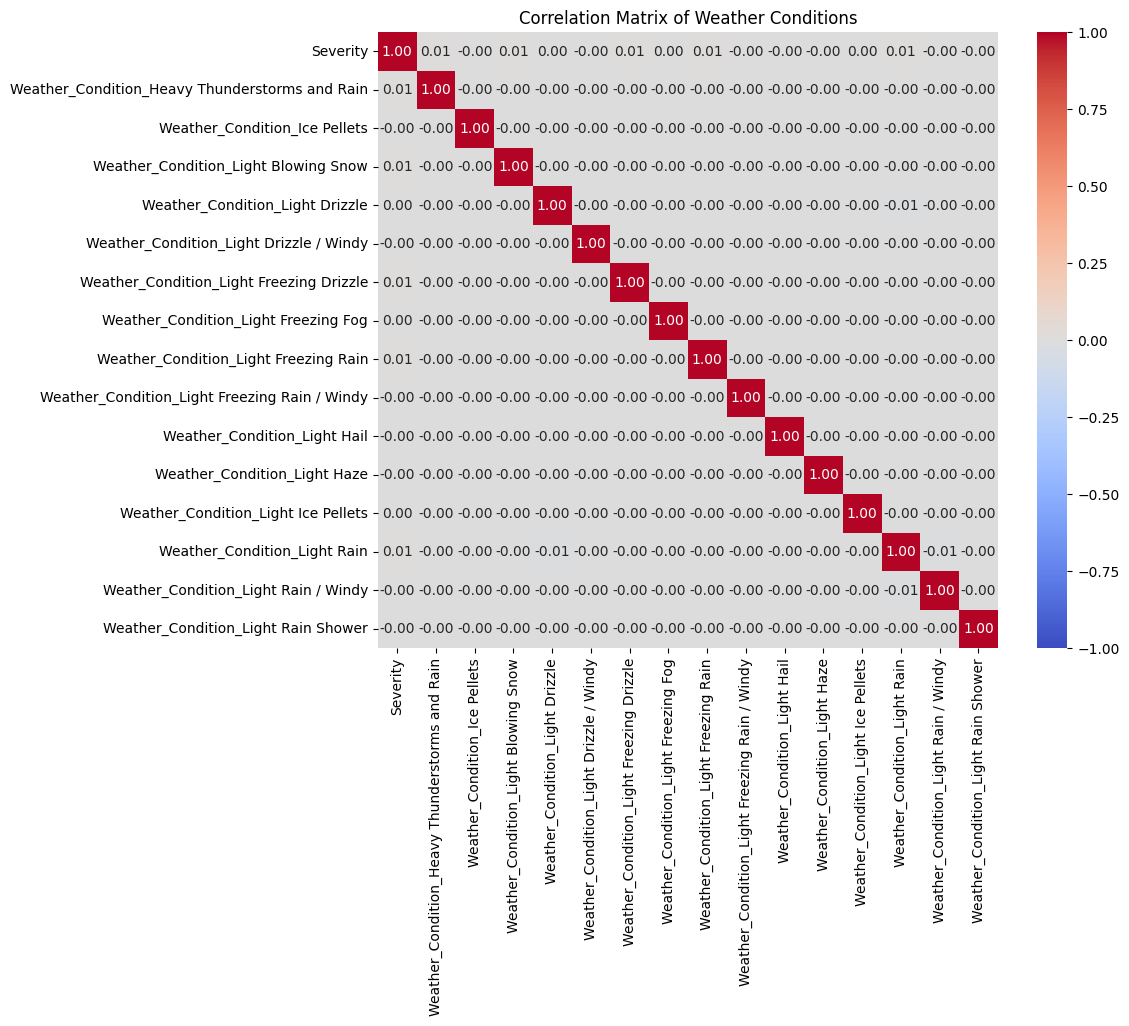

In [94]:
numerical_columns = ['Severity'] + weather_conditions[30:45]
df_corr_weather_conditions = df_corr[numerical_columns]
weather_corr = df_corr_weather_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather Conditions");

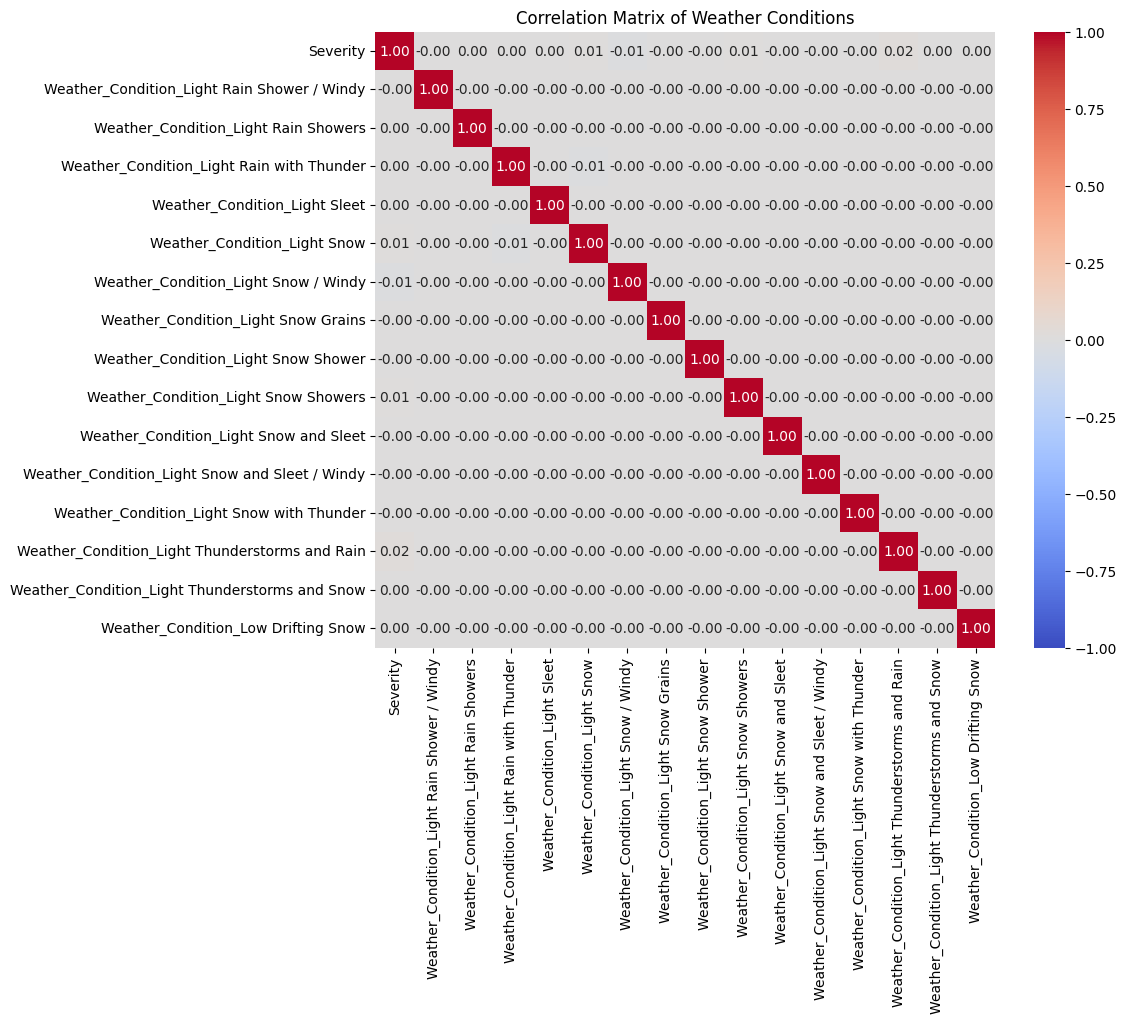

In [95]:
numerical_columns = ['Severity'] + weather_conditions[45:60]
df_corr_weather_conditions = df_corr[numerical_columns]
weather_corr = df_corr_weather_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather Conditions");

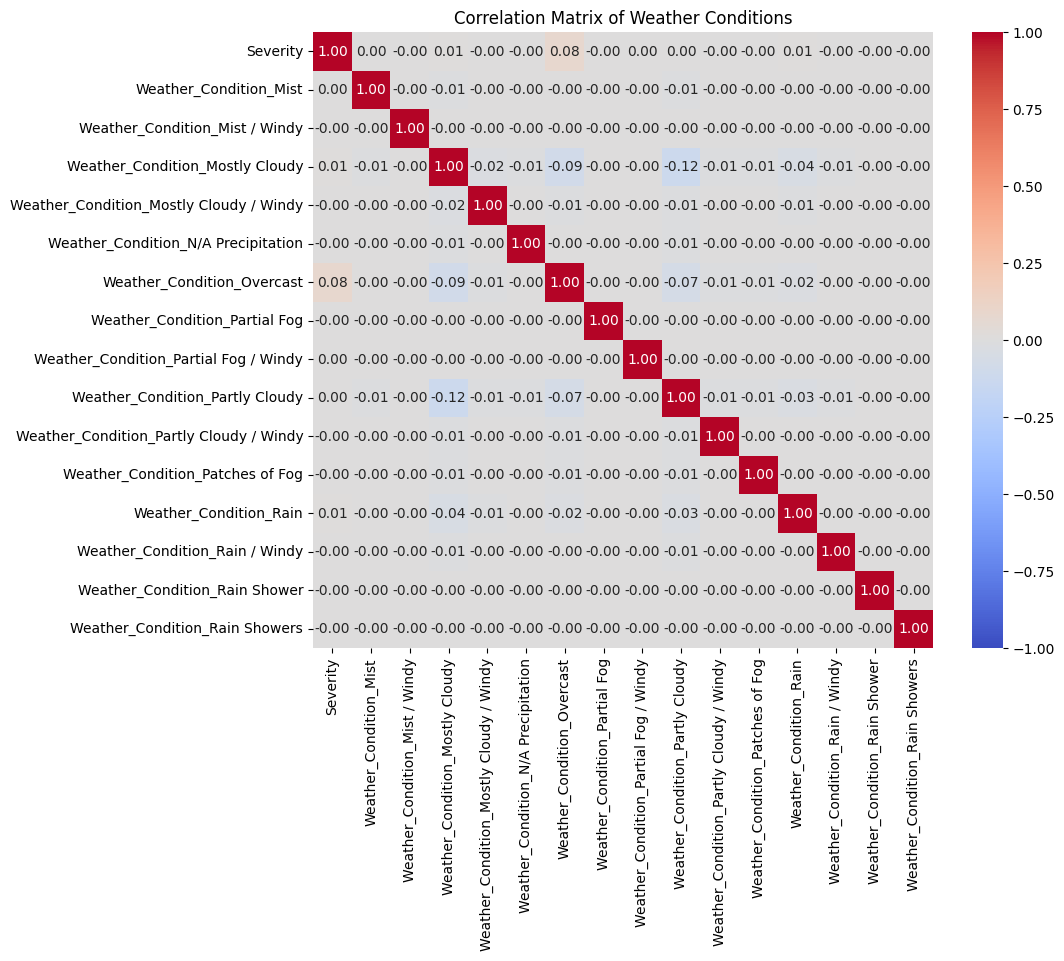

In [96]:
numerical_columns = ['Severity'] + weather_conditions[60:75]
df_corr_weather_conditions = df_corr[numerical_columns]
weather_corr = df_corr_weather_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather Conditions");

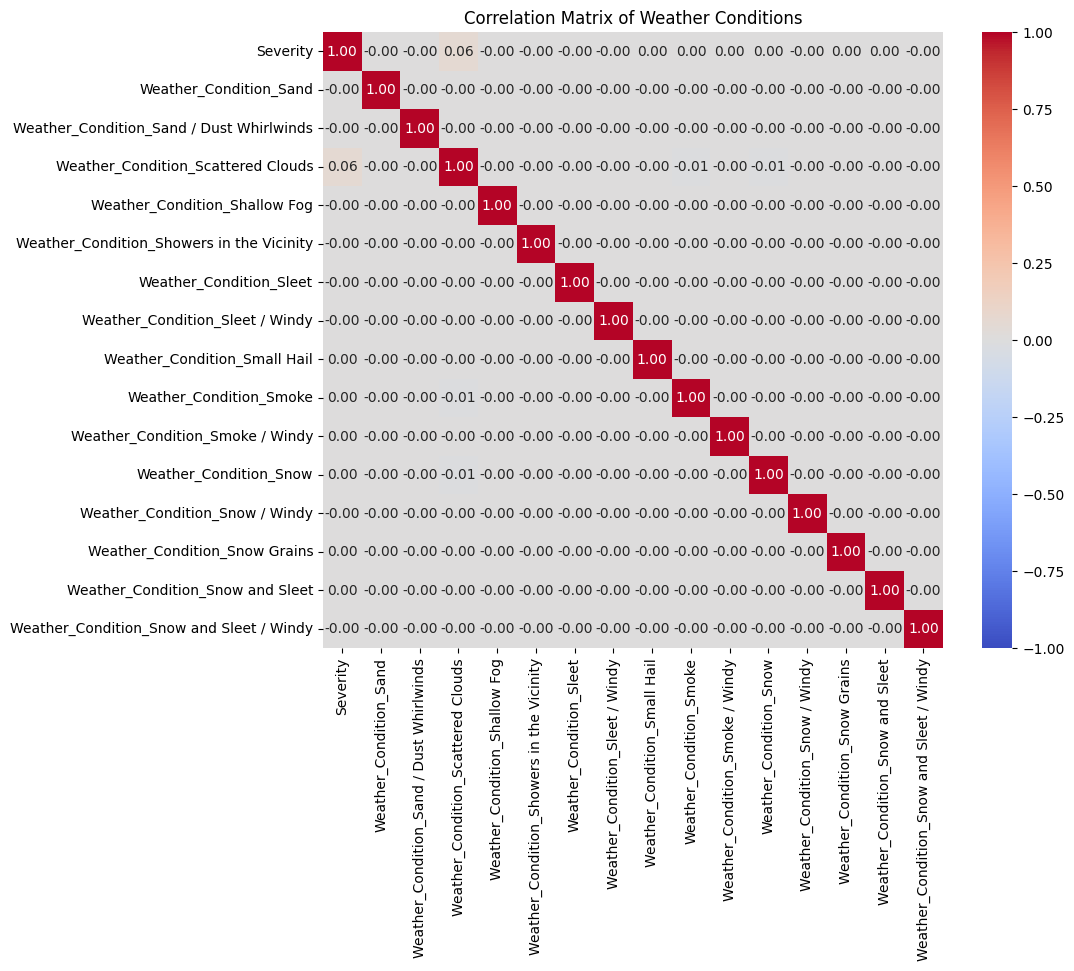

In [97]:
numerical_columns = ['Severity'] + weather_conditions[75:90]
df_corr_weather_conditions = df_corr[numerical_columns]
weather_corr = df_corr_weather_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather Conditions");

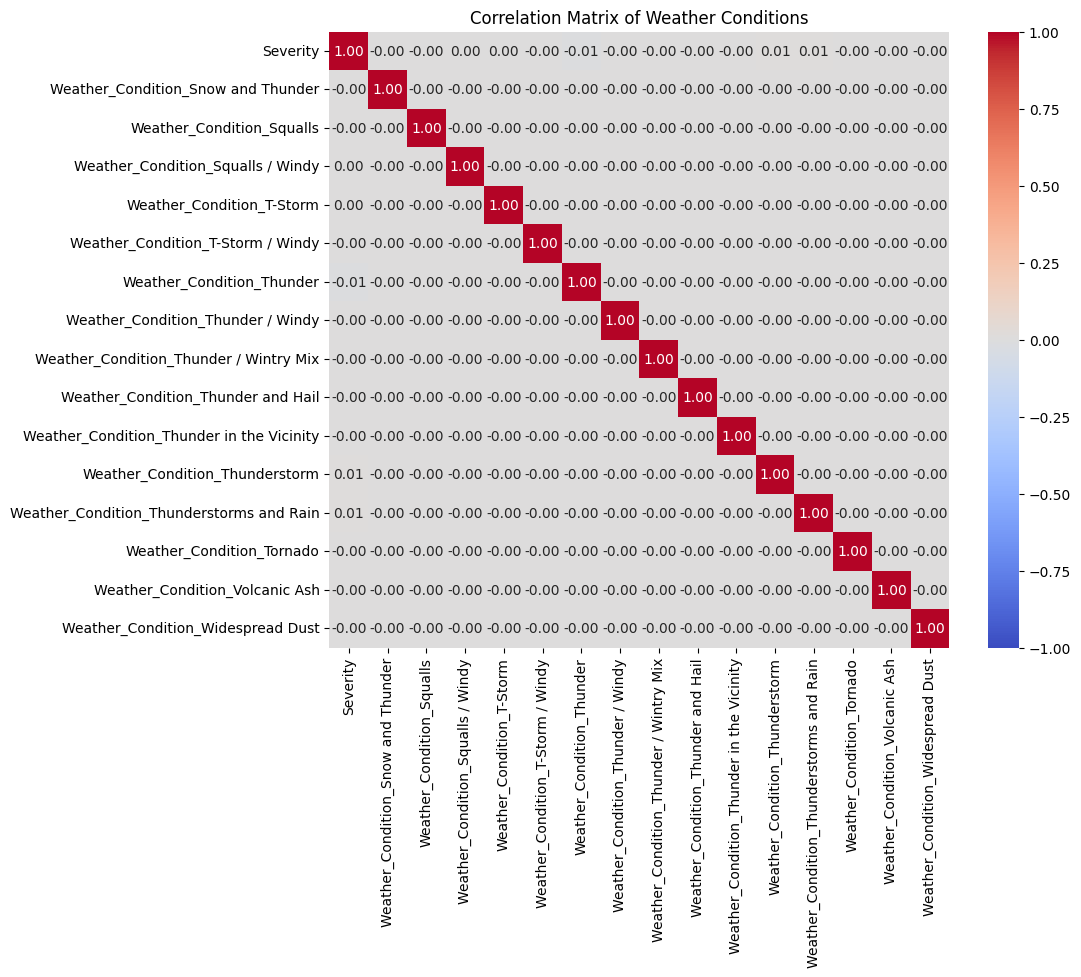

In [98]:
numerical_columns = ['Severity'] + weather_conditions[90:105]
df_corr_weather_conditions = df_corr[numerical_columns]
weather_corr = df_corr_weather_conditions.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    weather_corr,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix of Weather Conditions");